In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Mobile Price Pred/EDA/Mobile Price Prediction Datatset.csv')

In [ ]:
data.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [ ]:
data.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


1. Target Column - Price
2. Price depends on given feature column
3. Min RAM and ROM cant be zero




In [ ]:
data.rename(columns={'Brand me':'Brand'},inplace=True)

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

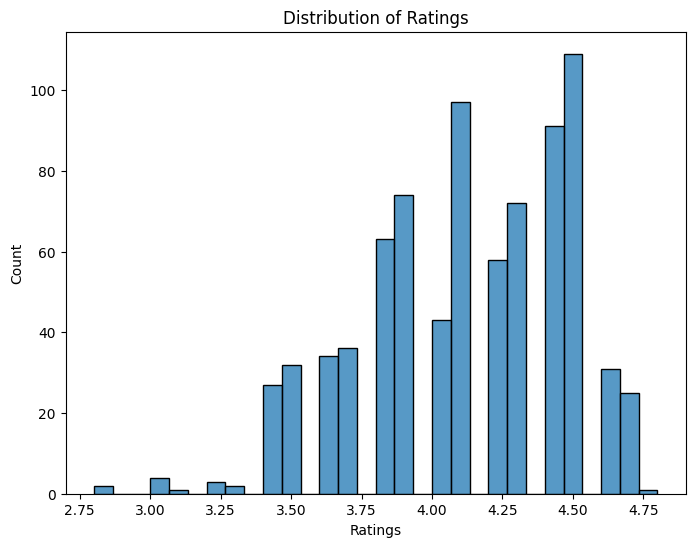

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Ratings', bins=30)
plt.title('Distribution of Ratings')
plt.show()

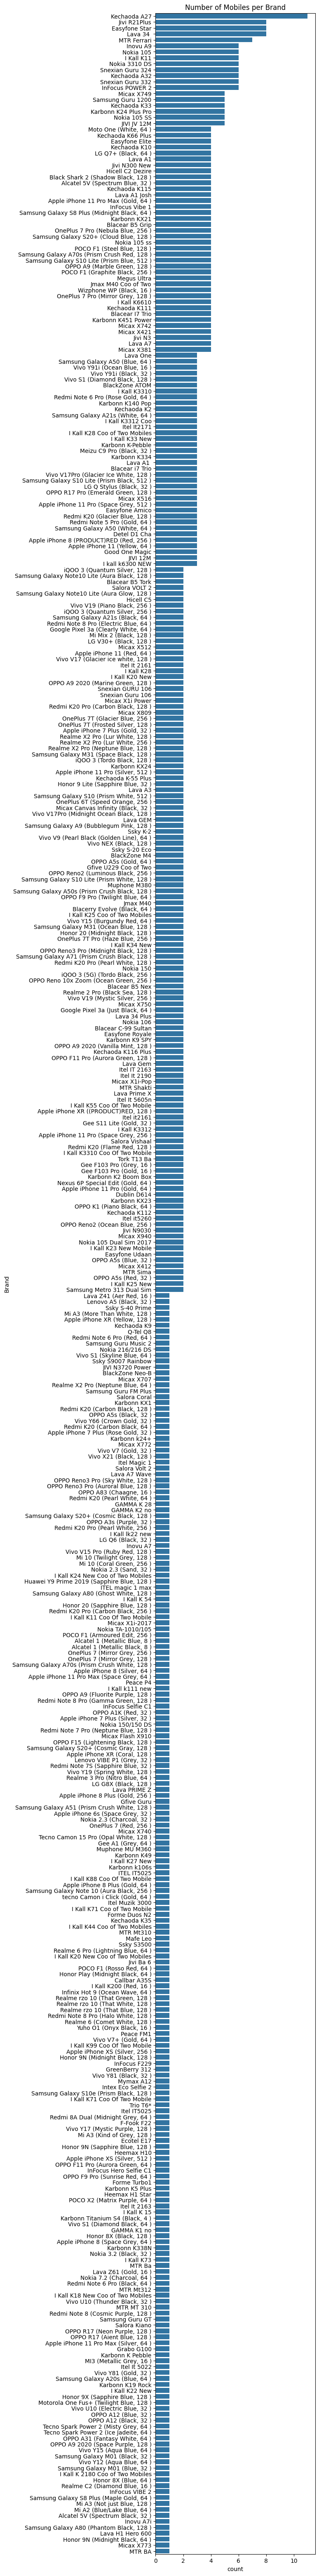

In [ ]:
plt.figure(figsize=(5,80))
sns.countplot(y='Brand', data=data, order=data['Brand'].value_counts().index)
plt.title('Number of Mobiles per Brand')
plt.show()

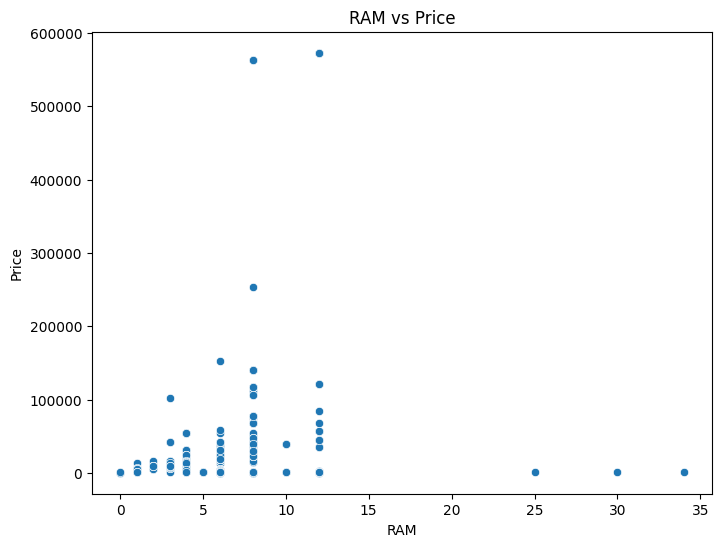

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RAM', y='Price', data=data)
plt.title('RAM vs Price')
plt.show()

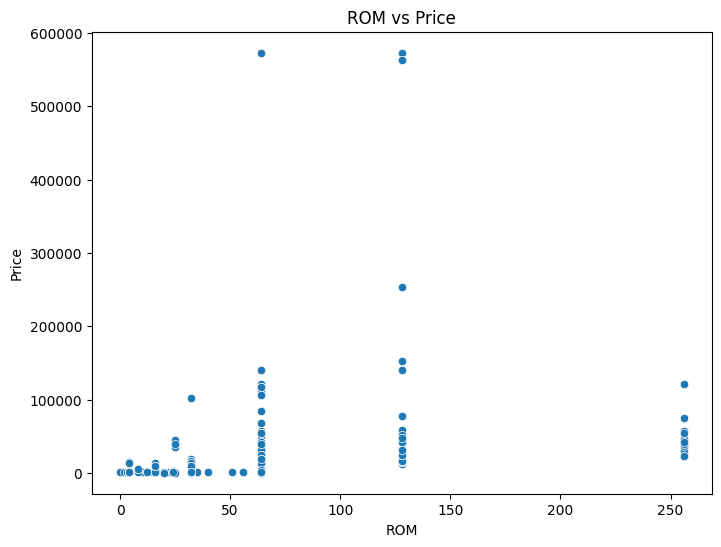

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ROM', y='Price', data=data)
plt.title('ROM vs Price')
plt.show()

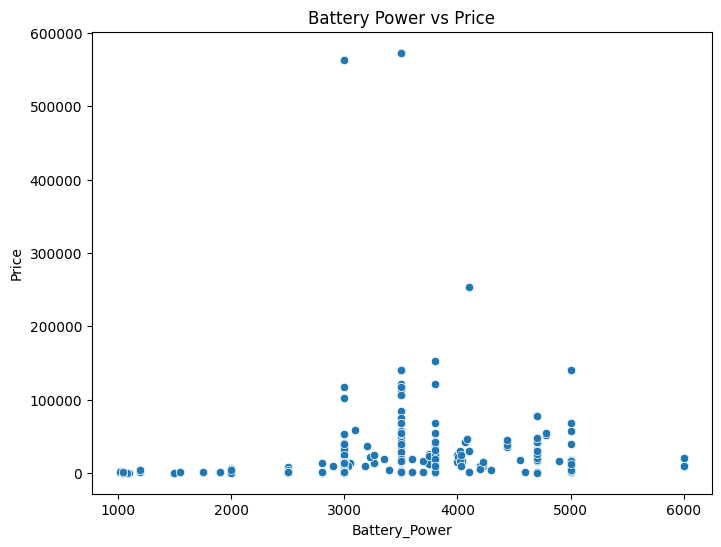

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Battery_Power', y='Price', data=data)
plt.title('Battery Power vs Price')
plt.show()

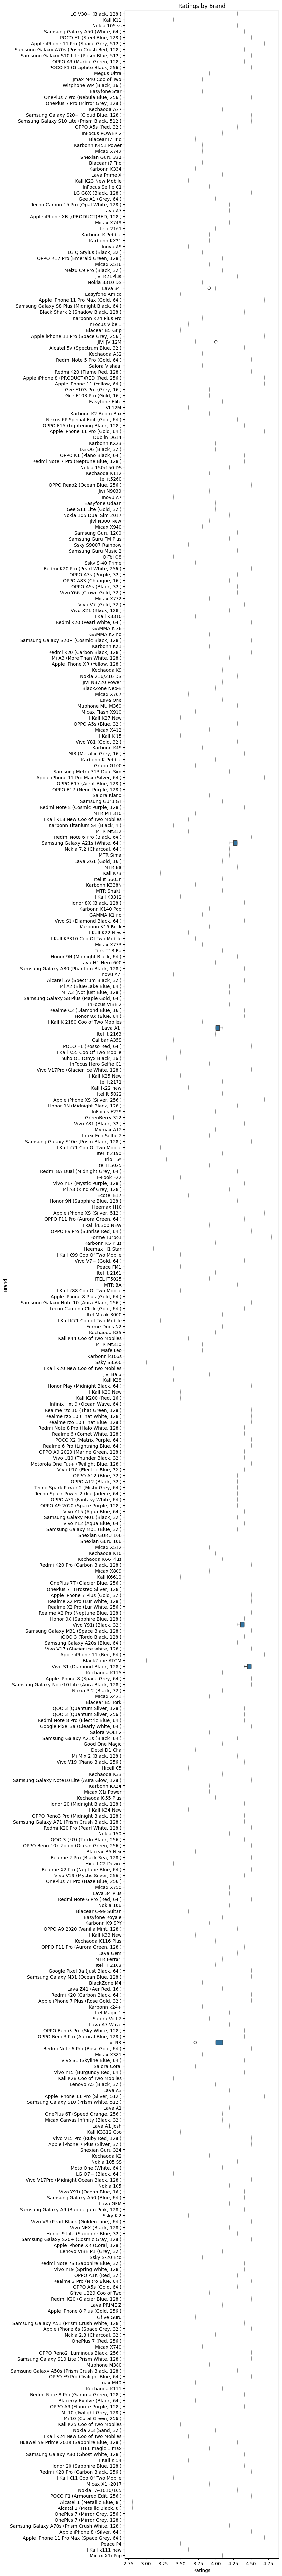

In [ ]:
plt.figure(figsize=(6,100))
sns.boxplot(x='Ratings', y='Brand', data=data)
plt.title('Ratings by Brand')
plt.show()

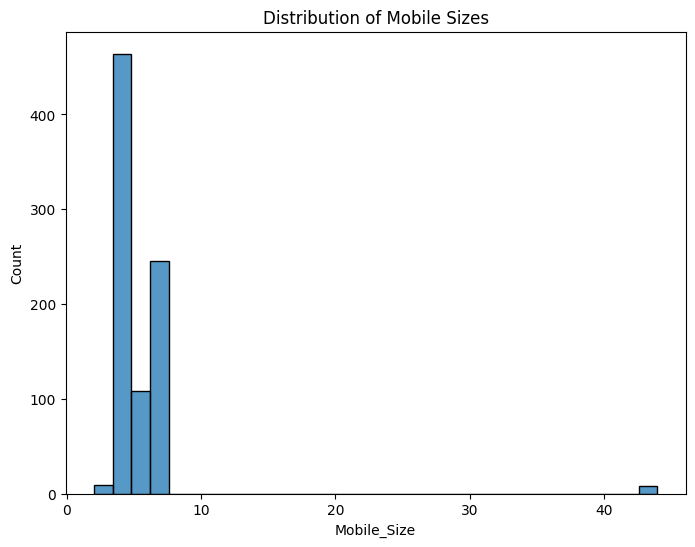

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Mobile_Size', bins=30)
plt.title('Distribution of Mobile Sizes')
plt.show()

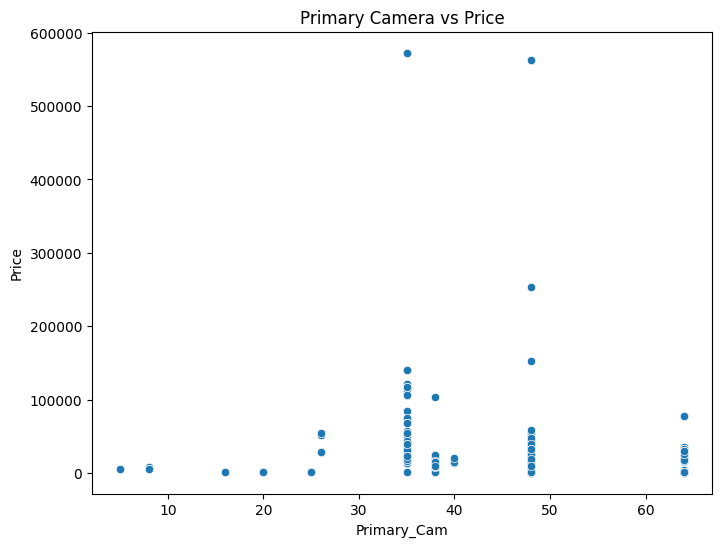

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Primary_Cam', y='Price', data=data)
plt.title('Primary Camera vs Price')
plt.show()

In [ ]:
x=data.drop('Price',axis=1)
y=data['Price']

In [ ]:
x.isnull().sum()

Brand              0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
dtype: int64

In [ ]:
mean=x['Ratings'].mean()
mean

4.103105590062111

In [ ]:
x['Ratings'].fillna(value=mean,inplace=True)

In [ ]:
x['RAM'] = x['RAM'].fillna(x['RAM'].median())

In [ ]:
x['ROM'] = x['ROM'].fillna(x['ROM'].median())

In [ ]:
x['Mobile_Size'] = x['Mobile_Size'].fillna(x['Mobile_Size'].median())

In [ ]:
x['Selfi_Cam'] = x['Selfi_Cam'].fillna(x['Selfi_Cam'].median())

In [ ]:
x.isnull().sum()

Brand            0
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
dtype: int64

In [ ]:
x.head()

,Brand,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800


In [ ]:
len(x['Brand'].unique())

427

In [ ]:
x.Brand.value_counts()

Brand
Kechaoda A27                                11
Jivi R21Plus                                 8
Easyfone Star                                8
Lava 34                                      8
MTR Ferrari                                  7
                                            ..
Samsung Galaxy A80 (Phantom Black, 128 )     1
Lava H1 Hero 600                             1
Honor 9N (Midnight Black, 64 )               1
Micax X773                                   1
MTR BA                                       1
Name: count, Length: 427, dtype: int64

In [ ]:
x.Brand.value_counts().to_dict()

{'Kechaoda A27': 11,
 'Jivi R21Plus': 8,
 'Easyfone Star': 8,
 'Lava 34 ': 8,
 'MTR Ferrari': 7,
 'Inovu A9': 6,
 'Nokia 105': 6,
 'I Kall K11': 6,
 'Nokia 3310 DS': 6,
 'Snexian Guru 324': 6,
 'Kechaoda A32': 6,
 'Snexian Guru 332': 6,
 'InFocus POWER 2': 6,
 'Micax X749': 5,
 'Samsung Guru 1200': 5,
 'Kechaoda K33': 5,
 'Karbonn K24 Plus Pro': 5,
 'Nokia 105 SS': 5,
 'JIVI JV 12M': 5,
 'Moto One (White, 64 )': 4,
 'Kechaoda K66 Plus': 4,
 'Easyfone Elite': 4,
 'Kechaoda K10': 4,
 'LG Q7+ (Black, 64 )': 4,
 'Lava A1': 4,
 'Jivi N300 New': 4,
 'Hicell C2 Dezire': 4,
 'Black Shark 2 (Shadow Black, 128 )': 4,
 'Alcatel 5V (Spectrum Blue, 32 )': 4,
 'Kechaoda K115': 4,
 'Lava A1 Josh': 4,
 'Apple iPhone 11 Pro Max (Gold, 64 )': 4,
 'InFocus Vibe 1': 4,
 'Samsung Galaxy S8 Plus (Midnight Black, 64 )': 4,
 'Karbonn KX21': 4,
 'Blacear B5 Grip': 4,
 'OnePlus 7 Pro (Nebula Blue, 256 )': 4,
 'Samsung Galaxy S20+ (Cloud Blue, 128 )': 4,
 'Nokia 105 ss': 4,
 'POCO F1 (Steel Blue, 128 )': 4,
 'Sa

In [ ]:
x_frequency_map=x.Brand.value_counts().to_dict()

In [ ]:
x.Brand=x.Brand.map(x_frequency_map)

In [ ]:
x.head()

,Brand,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,2,4.3,4.0,128.0,6.00,48,13.0,4000
1,6,3.4,6.0,64.0,4.50,48,12.0,4000
2,4,4.3,4.0,4.0,4.50,64,16.0,4000
3,3,4.4,6.0,64.0,6.40,48,15.0,3800
4,4,4.5,6.0,128.0,6.18,35,15.0,3800


<Axes: ylabel='Brand'>

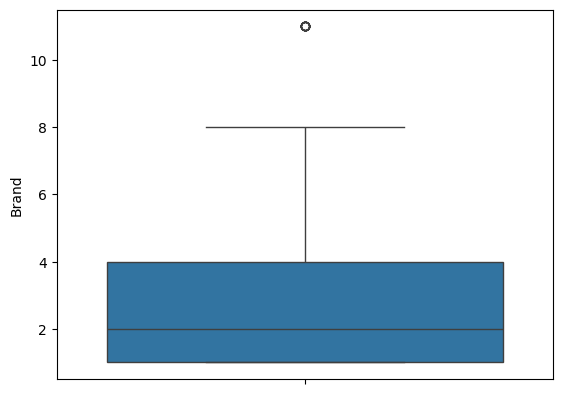

In [ ]:
sns.boxplot(x['Brand'])

<Axes: ylabel='Ratings'>

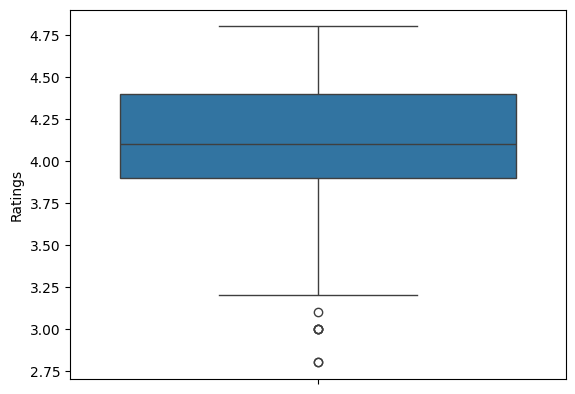

In [ ]:
sns.boxplot(x['Ratings'])

<Axes: ylabel='RAM'>

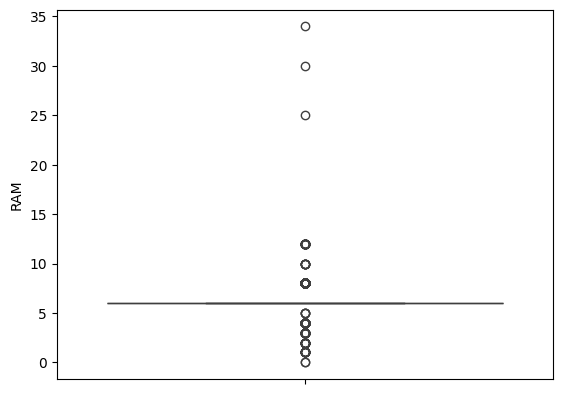

In [ ]:
sns.boxplot(x['RAM'])

<Axes: ylabel='ROM'>

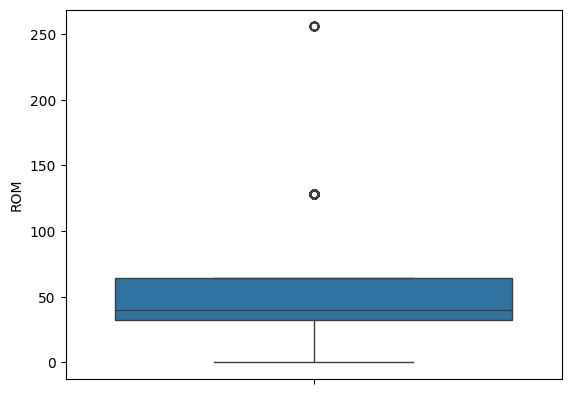

In [ ]:
sns.boxplot(x['ROM'])

<Axes: ylabel='Mobile_Size'>

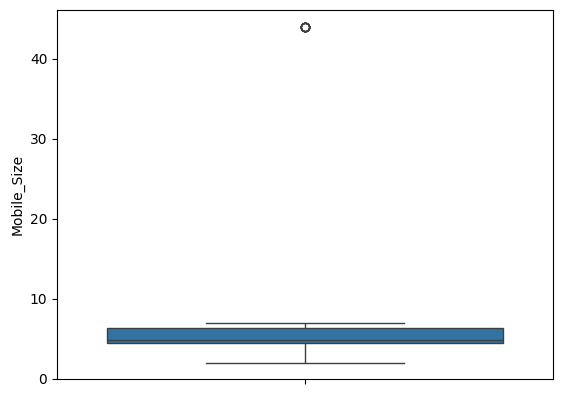

In [ ]:
sns.boxplot(x['Mobile_Size'])

<Axes: ylabel='Primary_Cam'>

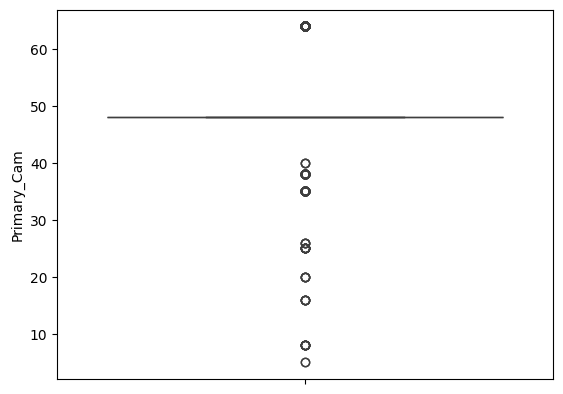

In [ ]:
sns.boxplot(x['Primary_Cam'])

<Axes: ylabel='Selfi_Cam'>

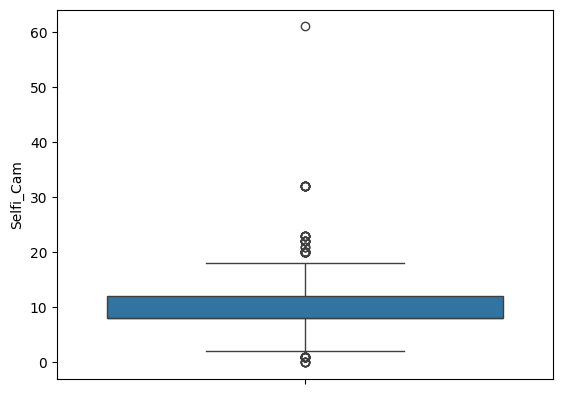

In [ ]:
sns.boxplot(x['Selfi_Cam'])

<Axes: ylabel='Battery_Power'>

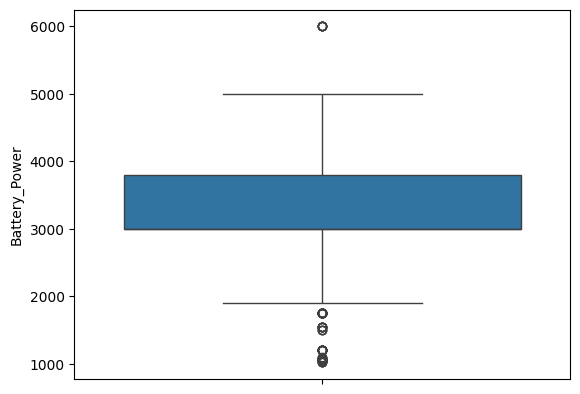

In [ ]:
sns.boxplot(x['Battery_Power'])

In [ ]:
upper_limit=x.Brand.mean()+3*x.Brand.std()
upper_limit

8.786666092625834

In [ ]:
lower_limit = x.Brand.mean() -3*x.Brand.std()
lower_limit

-2.968484274444016

In [ ]:
len(x.loc[x['Brand'] > upper_limit])

11

In [ ]:
data.shape[0]

836

In [ ]:
11/836*100

1.3157894736842104

In [ ]:
x.loc[x['Brand'] > upper_limit, 'Brand']=x['Brand'].median

In [ ]:
upper_limit=x.Ratings.mean()+3*x.Ratings.std()
upper_limit
lower_limit = x.Ratings.mean() -3*x.Ratings.std()
len(x.loc[x['Ratings'] > upper_limit])

0

In [ ]:
upper_limit=x.RAM.mean()+3*x.RAM.std()
lower_limit = x.RAM.mean() -3*x.RAM.std()
len(x.loc[x['RAM'] > upper_limit])

3

In [ ]:
4/836*100

0.4784688995215311

In [ ]:
x.loc[x['RAM'] > upper_limit, 'RAM']=x['RAM'].median

In [ ]:
upper_limit=x.ROM.mean()+3*x.ROM.std()
lower_limit = x.ROM.mean() -3*x.ROM.std()
len(x.loc[x['ROM'] > upper_limit])

33

In [ ]:
33/836*100

3.9473684210526314

In [ ]:
x.loc[x['ROM'] > upper_limit, 'R0M']=x['ROM'].median

In [ ]:
upper_limit=x.Mobile_Size.mean()+3*x.Mobile_Size.std()
lower_limit = x.Mobile_Size.mean() -3*x.Mobile_Size.std()
len(x.loc[x['Mobile_Size'] > upper_limit])

8

In [ ]:
8/836*100

0.9569377990430622

In [ ]:
x.loc[x['Mobile_Size'] > upper_limit, 'Mobile_Size']=x['Mobile_Size'].median

In [ ]:
upper_limit=x.Primary_Cam.mean()+3*x.Primary_Cam.std()
lower_limit = x.Primary_Cam.mean() -3*x.Primary_Cam.std()
len(x.loc[x['Primary_Cam'] > upper_limit])

0

In [ ]:
upper_limit=x.Selfi_Cam.mean()+3*x.Selfi_Cam.std()
lower_limit = x.Selfi_Cam.mean() -3*x.Selfi_Cam.std()
len(x.loc[x['Selfi_Cam'] > upper_limit])

10

In [ ]:
10/836*100

1.1961722488038278

In [ ]:
x.loc[x['Selfi_Cam'] > upper_limit, 'Selfi_Cam']=x['Selfi_Cam'].median

In [ ]:
upper_limit=x.Battery_Power.mean()+3*x.Battery_Power.std()
lower_limit = x.Battery_Power.mean() -3*x.Battery_Power.std()
len(x.loc[x['Battery_Power'] > upper_limit])

0

In [ ]:
x.head()

,Brand,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,R0M
0,2,4.3,4.0,128.0,6.0,48,13.0,4000,<bound method NDFrame._add_numeric_operations....
1,6,3.4,6.0,64.0,4.5,48,12.0,4000,<bound method NDFrame._add_numeric_operations....
2,4,4.3,4.0,4.0,4.5,64,16.0,4000,NaN
3,3,4.4,6.0,64.0,6.4,48,15.0,3800,<bound method NDFrame._add_numeric_operations....
4,4,4.5,6.0,128.0,6.18,35,15.0,3800,<bound method NDFrame._add_numeric_operations....


In [ ]:
x = x.drop('R0M', axis=1)

In [ ]:
x.head()

,Brand,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,2,4.3,4.0,128.0,6.0,48,13.0,4000
1,6,3.4,6.0,64.0,4.5,48,12.0,4000
2,4,4.3,4.0,4.0,4.5,64,16.0,4000
3,3,4.4,6.0,64.0,6.4,48,15.0,3800
4,4,4.5,6.0,128.0,6.18,35,15.0,3800


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          836 non-null    object 
 1   Ratings        836 non-null    float64
 2   RAM            836 non-null    object 
 3   ROM            836 non-null    float64
 4   Mobile_Size    836 non-null    object 
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      836 non-null    object 
 7   Battery_Power  836 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 52.4+ KB


<Axes: xlabel='Ratings', ylabel='Count'>

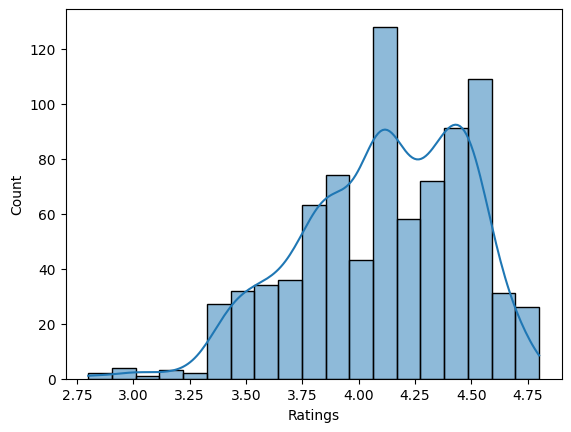

In [ ]:
sns.histplot(x.Ratings, kde=True)

<Axes: xlabel='ROM', ylabel='Count'>

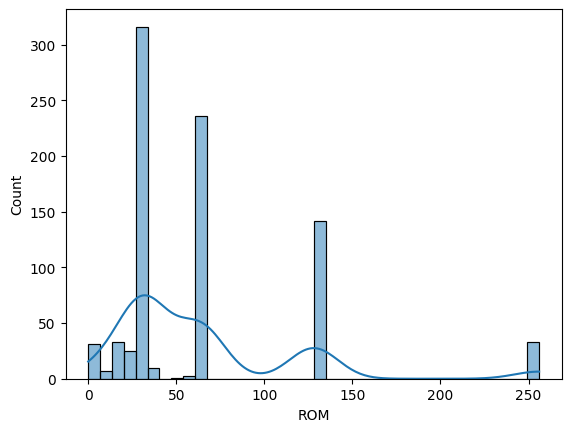

In [ ]:
sns.histplot(x.ROM, kde=True)

<Axes: xlabel='Primary_Cam', ylabel='Count'>

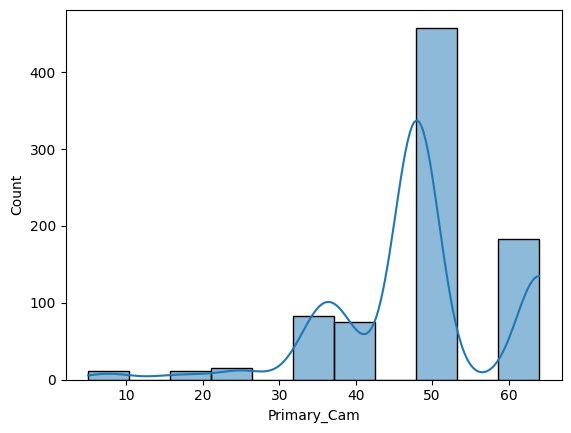

In [ ]:
sns.histplot(x.Primary_Cam, kde=True)

<Axes: xlabel='Battery_Power', ylabel='Count'>

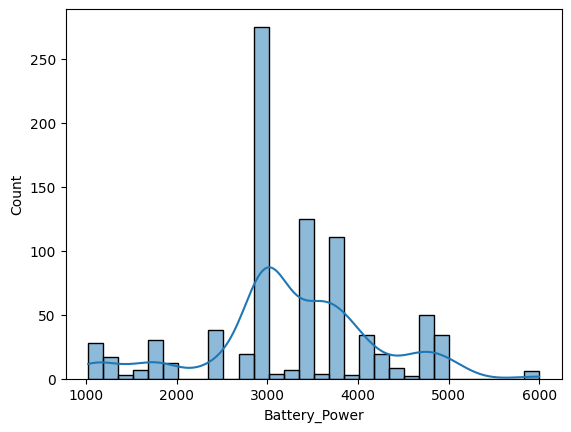

In [ ]:
sns.histplot(x.Battery_Power, kde=True)

In [ ]:
x.Ratings = np.log(x.Ratings)
x.ROM = np.log(x.ROM)
x.Primary_Cam = np.log(x.Primary_Cam)
x.Battery_Power = np.log(x.Battery_Power)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Price'>

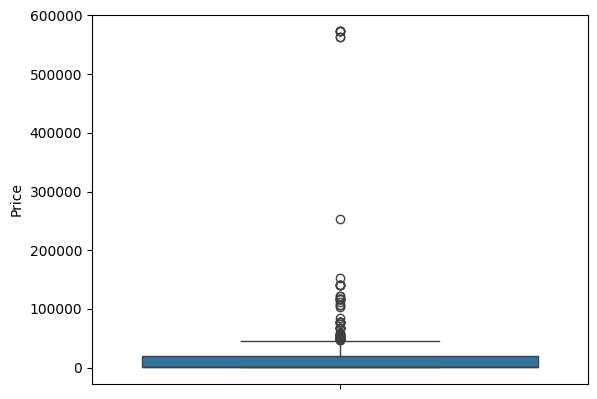

In [ ]:
sns.boxplot(y)

<Axes: xlabel='Price', ylabel='Count'>

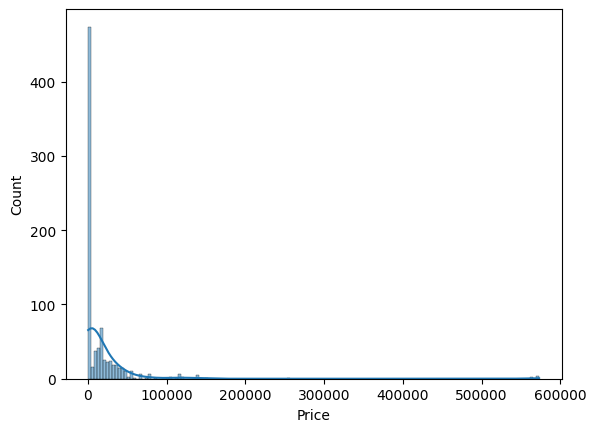

In [ ]:
sns.histplot(y, kde=True)

In [ ]:
y = np.log1p(y)

In [ ]:
y.head()

0    10.126631
1     9.680344
2     9.615872
3     9.852194
4     9.852194
Name: Price, dtype: float64

In [ ]:
y.isnull().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()